In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.optim as opt
from PIL import Image
from pathlib import Path
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
import math

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
PATH=Path("/content/drive/MyDrive/data/mnist")

In [4]:
image = Image.open(PATH/"train/3/img_10829.jpg")

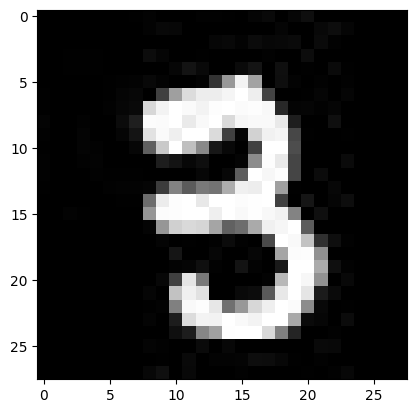

In [5]:
plt.imshow(image, cmap='gray');

In [6]:
np.array(image, dtype="float")

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   3.,   0.,   0.,
          0.,   2.,   2.,   1.,   0.,   5.,   9.,   0.,   6.,  14.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.,   8.,   7.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   5.,   0.,   0.,   8.,
         13.,   5.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   6.,   8.,   3.,  11.,   7.,   8.,  10.,   0.,  10.,
          2.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   1.,   1.,   1.,   0.,   0.,   0.,  12.,   5.,   0.,
          0.,   1.,   0.,   0.,   0.,   0.,   2.,   0.,   0.,  12.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   1.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   6.,
         19.,   9.,   0.,   0.,  10.,  20.,   0.,  15.,   0.,   1.,   0.,
         10.,   1.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0

In [7]:
torch.tensor(np.array(image))

tensor([[  0,   0,   0,   0,   0,   0,   0,   1,   3,   0,   0,   0,   2,   2,
           1,   0,   5,   9,   0,   6,  14,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   3,   8,   7,   0,   0,   0,
           0,   0,   0,   0,   5,   0,   0,   8,  13,   5,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
           8,   3,  11,   7,   8,  10,   0,  10,   2,   0,   0,   0,   0,   0],
        [  0,   0,   1,   1,   1,   0,   0,   0,  12,   5,   0,   0,   1,   0,
           0,   0,   0,   2,   0,   0,  12,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   1,   1,   1,   0,   0,   0,   0,   0,   6,  19,   9,   0,
           0,  10,  20,   0,  15,   0,   1,   0,  10,   1,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   1,   2,   3,   8,   3,   0,   0,   3,  51,
         152, 243, 163,   0,  14,   3,   0,   2,   0,   2,   0,   0,   0,   0],
        [  1,   0,   0,   0,   0,   1,   5,   

In [8]:
df = pd.DataFrame(np.array(image))

In [9]:
df.style.set_properties().background_gradient("Greys")

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,1,3,0,0,0,2,2,1,0,5,9,0,6,14,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,3,8,7,0,0,0,0,0,0,0,5,0,0,8,13,5,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,6,8,3,11,7,8,10,0,10,2,0,0,0,0,0
3,0,0,1,1,1,0,0,0,12,5,0,0,1,0,0,0,0,2,0,0,12,0,0,0,0,0,0,0
4,0,0,1,1,1,0,0,0,0,0,6,19,9,0,0,10,20,0,15,0,1,0,10,1,0,0,0,0
5,0,0,0,0,0,1,2,3,8,3,0,0,3,51,152,243,163,0,14,3,0,2,0,2,0,0,0,0
6,1,0,0,0,0,1,5,7,0,64,159,220,237,237,245,255,238,67,0,0,1,5,0,5,0,0,0,0
7,1,0,0,0,0,2,6,9,215,244,255,250,243,253,255,251,253,248,41,4,5,2,5,0,0,0,0,0
8,4,0,0,2,0,0,11,31,252,251,255,234,249,255,218,246,249,249,233,30,0,0,15,0,0,0,0,0
9,2,0,0,4,0,0,5,20,226,250,239,255,255,219,64,4,210,241,245,71,1,0,0,1,0,0,0,0


In [10]:
Path.ls = lambda x: list(x.iterdir())

In [11]:
three =[torch.tensor(np.array(Image.open(img)), dtype = torch.float32) for img in (PATH/"train/3").ls()]

In [12]:
two =[torch.tensor(np.array(Image.open(img)), dtype = torch.float32) for img in (PATH/"train/2").ls()]

In [13]:
two_stacked = torch.stack(two) / 255

In [14]:
three_stacked = torch.stack(three) / 255

In [15]:
three_stacked.shape

torch.Size([3263, 28, 28])

In [16]:
valid_2 =torch.stack([torch.tensor(np.array(Image.open(img)), dtype = torch.float32) for img in (PATH/"validation/2").ls()]) / 255

In [17]:
valid_3 =torch.stack([torch.tensor(np.array(Image.open(img)), dtype = torch.float32) for img in (PATH/"validation/3").ls()]) / 255

In [18]:
valid_2.shape

torch.Size([1098, 28, 28])

In [19]:
train_x = torch.cat([three_stacked, two_stacked]).view(-1, 28*28)               #Modele beslerken 2 ve 3'leri birlikte beslemeliyiz.

In [20]:
labels = {1:"Three", 0:"Two"}

In [21]:
train_y = torch.tensor([1] * len(three) + [0] * len(two))

In [22]:
train_x.shape, train_y.shape

(torch.Size([6352, 784]), torch.Size([6352]))

In [23]:
train_y.unsqueeze_(-1)

tensor([[1],
        [1],
        [1],
        ...,
        [0],
        [0],
        [0]])

In [24]:
train_y.shape

torch.Size([6352, 1])

In [25]:
valid_x = torch.cat([valid_3, valid_2]).view(-1, 28*28)

In [26]:
valid_y = torch.tensor([1] * len(valid_3) + [0] * len(valid_2))

In [27]:
valid_y.shape

torch.Size([2186])

In [28]:
valid_y = valid_y.unsqueeze(1)

In [29]:
valid_y.shape

torch.Size([2186, 1])

In [30]:
class Dataset():
    def __init__(self, x, y):
        self.x,self.y = x,y
    def __len__(self):
        return len(self.x)
    def __getitem__(self, i):
        return self.x[i],self.y[i]

In [31]:
ds_train = Dataset(train_x, train_y)

In [32]:
ds_valid = Dataset(valid_x, valid_y)

In [33]:
def init(size):
    return torch.randn(size, dtype=torch.float32).requires_grad_()

In [34]:
w = init((28*28,1))

In [35]:
w.shape

torch.Size([784, 1])

In [36]:
b = init(1)

In [37]:
def sigmoid(x):
    return 1/(1+torch.exp(-x))

In [38]:
def loss_func(preds, targets):
    preds = preds.sigmoid()
    return torch.where(targets==1, 1-preds, preds).mean()

In [39]:
class DataLoader():
    def __init__(self, ds, bs):
        self.ds, self.bs = ds, bs
    def __iter__(self):
        n = len(self.ds)
        l = torch.randperm(n)


        for i in range(0, n, self.bs):
            idxs_l = l[i:i+self.bs]
            yield self.ds[idxs_l]

In [40]:
train_dl = DataLoader(ds_train, bs = 256)

In [41]:
valid_dl = DataLoader(ds_valid, bs = 256)

In [42]:
xb, yb = next(iter(train_dl))

In [43]:
xb, yb = next(iter(valid_dl))

In [44]:
def accuracy(preds, actuals):
    preds = preds.sigmoid()
    correct = (preds > 0.5) == actuals
    return correct.float().mean()

In [45]:
def validation_acc(model):
    return torch.stack([accuracy(model(xb), yb) for xb, yb in valid_dl]).mean().item()

In [46]:
def relu(x):
    return x.clamp_min(0.0)

In [47]:
model = nn.Sequential(
    nn.Linear(28*28,30),
    nn.ReLU(),
    nn.Linear(30,10),
    nn.ReLU(),
    nn.Linear(10,5),
    nn.ReLU(),
    nn.Linear(5,1)
)

In [50]:
def train(model, epochs=5, valid_epoch=5):
    for epoch in range(epochs):
        for xb, yb in train_dl:
            preds = model(xb)
            loss = loss_func(preds, yb)
            loss.backward()
            optim.step()
            optim.zero_grad()

        if epoch % valid_epoch == 0:
            print(validation_acc(model))

In [51]:
optim = opt.SGD(model.parameters(), lr=1)
train(model, 40, 2)

0.9566664099693298
0.964850127696991
0.9717316031455994
0.9637303948402405
0.9762542247772217
0.9694355726242065
0.9635480046272278
0.9753233790397644
0.9700584411621094
0.9725367426872253
0.9616860151290894
0.9742728471755981
0.9781161546707153
0.9800976514816284
0.979663610458374
0.9805945158004761
0.9789213538169861
0.9805945158004761
0.9817708134651184
0.9811543226242065
